In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc

In [118]:
mush=pd.read_csv('mushrooms.csv')

In [119]:
mush.shape

(8124, 23)

In [120]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [121]:
mush.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [122]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [123]:
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [127]:
features = mush.iloc[:,1:]
features = pd.get_dummies(features).astype(float)  #one hot encoding
features.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [129]:
from sklearn.preprocessing import LabelEncoder
target = mush.iloc[:,0]
target=le.fit_transform(target.astype(str))
target

array([1, 0, 0, ..., 0, 1, 0])

In [134]:
x = features.values
y = target

In [135]:
target.shape

(8124,)

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=20)

In [137]:
logr=LogisticRegression()

In [138]:
logr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
y_pred = logr.predict(x_test)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1910
           1       1.00      1.00      1.00      1746

    accuracy                           1.00      3656
   macro avg       1.00      1.00      1.00      3656
weighted avg       1.00      1.00      1.00      3656



In [141]:
print(confusion_matrix(y_test,y_pred))

[[1910    0]
 [   0 1746]]


In [142]:
print(metrics.accuracy_score(y_test,y_pred))

1.0


In [143]:
from sklearn.metrics import roc_curve
y_predict_prob = logr.predict_proba(x_test)[:, 1]

In [144]:
y_predict_prob.shape

(3656,)

In [145]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob)

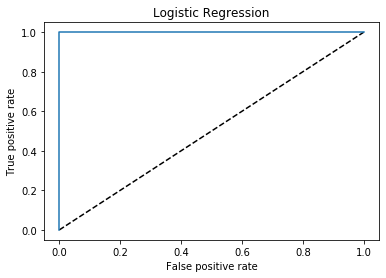

In [146]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [147]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

1.0


In [148]:
roc_auc = auc(fpr, tpr)
print (roc_auc)

1.0


In [171]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.9398249452954048
[[1690  220]
 [   0 1746]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1910
           1       0.89      1.00      0.94      1746

    accuracy                           0.94      3656
   macro avg       0.94      0.94      0.94      3656
weighted avg       0.95      0.94      0.94      3656



In [175]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.9159637885848282


In [176]:
roc_auc = auc(fpr, tpr)
print (roc_auc)

0.9893923582998987


In [172]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[1910    0]
 [   0 1746]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1910
           1       1.00      1.00      1.00      1746

    accuracy                           1.00      3656
   macro avg       1.00      1.00      1.00      3656
weighted avg       1.00      1.00      1.00      3656



In [177]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.9159637885848282


In [178]:
roc_auc = auc(fpr, tpr)
print (roc_auc)

0.9893923582998987


In [173]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[1910    0]
 [   0 1746]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1910
           1       1.00      1.00      1.00      1746

    accuracy                           1.00      3656
   macro avg       1.00      1.00      1.00      3656
weighted avg       1.00      1.00      1.00      3656



In [179]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.9159637885848282


In [180]:
roc_auc = auc(fpr, tpr)
print (roc_auc)

0.9893923582998987


In [174]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9972647702407003
[[1910    0]
 [  10 1736]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1910
           1       1.00      0.99      1.00      1746

    accuracy                           1.00      3656
   macro avg       1.00      1.00      1.00      3656
weighted avg       1.00      1.00      1.00      3656



In [181]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.9159637885848282


In [182]:
roc_auc = auc(fpr, tpr)
;:print (roc_auc)

0.9893923582998987


Logistic regression,KNN and decission tree models are performing well (ie: Accuracy= 1)